How to transform my data to use the library


<Axes: xlabel='Date'>

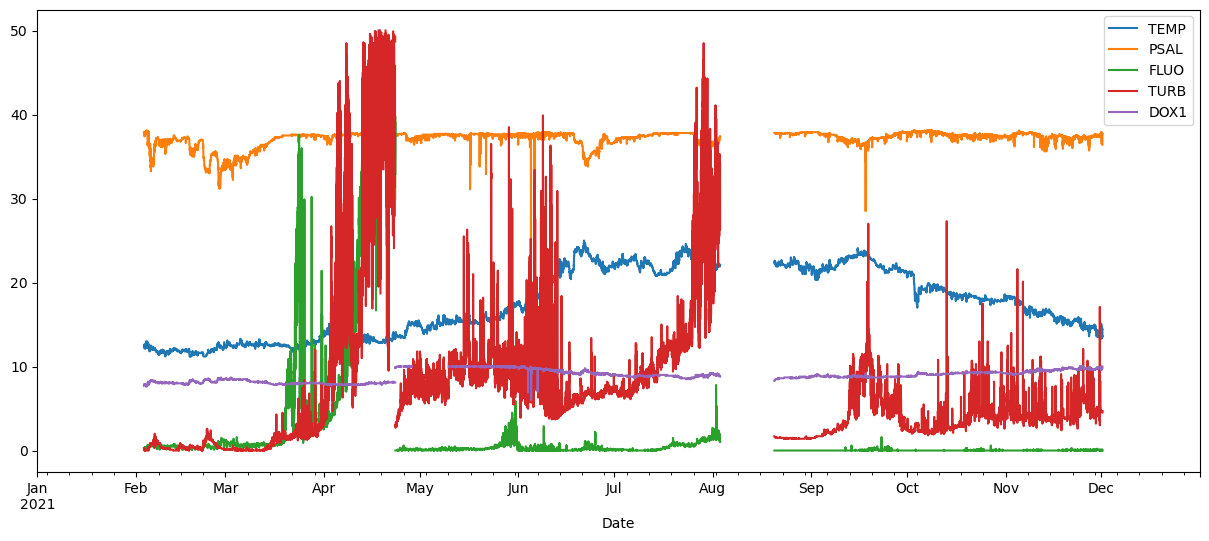

In [1]:
import pandas as pd
import datetime as dt

# https://github.com/fbourrin/coast_hf/
fname = "https://raw.githubusercontent.com/fbourrin/coast_hf/refs/heads/main/data/POEM_subsurface_2020_2021/oobobsbuo_poem_ctd0med5m_2021.csv"
raws = pd.read_table(fname, 
                     skiprows=1, 
                     header=None, 
                     decimal='.', 
                     sep = ",",
                     names=["Date","TEMP","PSAL","FLUO","TURB","DOX1"],
                     parse_dates=["Date"],
                     date_format="%Y-%m-%d %H:%M:%S",
                    )
raws.set_index('Date', inplace=True)
raws.plot(figsize=(15, 6))

Edit the config_sites.cfg file to add the following lines in the `[config]` section :
```python
    [[POEM]]
      name = 'COAST-HF POEM'
      longitude =  3.067
      latitude  = 42.704
      [[[PSAL]]]
        V_max = 40
```


It is also possible to use the `site = 'TEST'`



<Axes: ylabel='Temperature (°C)'>

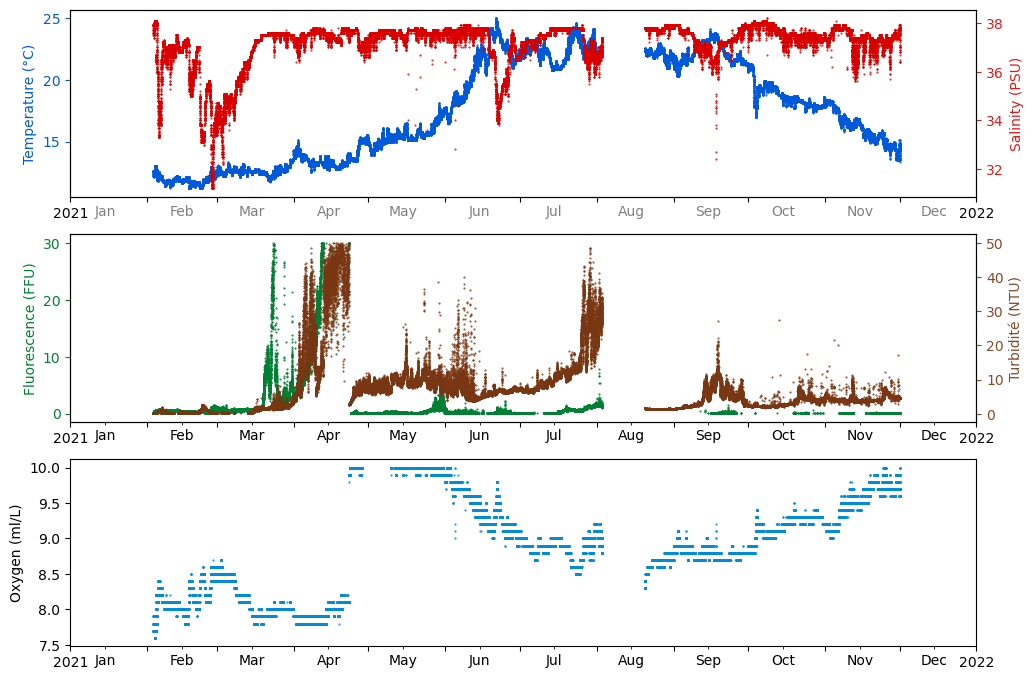

In [3]:
import pyCoastHF
import matplotlib.pyplot as plt

site = "POEM"
d_str = dt.datetime(2021,1,1)
d_end = dt.datetime(2022,1,1)

S = pyCoastHF.sonde.SondeData('%d' % d_str.year, 'GLOBAL', site)
S.raws = raws
S.apply_qc(d_str, d_end)
S.define_data()
S.define_position()
S.save_netcdf()  

var = [['TEMP','PSAL'], ['FLUO','TURB'],'DOX1']
plt.figure(figsize=(29.7 / 2.54, 21 / 2.54))
sub = None
for i, v in enumerate(var):
    sub = pyCoastHF.common.plot_var(
        [S], v, i, len(var), d_str, d_end, raw=False, Dmean=False, sub=sub, uniqueCol=True, legend=False
    )
pyCoastHF.common.format_date_xaxis(sub[0][0][0])


This code created a netCDF file `POEM_GLOBAL_2021.nc`, it is now possible to launch the GUI `ValidManuel.py`